In [1]:
install.packages('quantmod')
library(quantmod)

package 'quantmod' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\HP\AppData\Local\Temp\RtmpiC9ObS\downloaded_packages


Warning message:
"package 'quantmod' was built under R version 3.6.3"Loading required package: xts
Warning message:
"package 'xts' was built under R version 3.6.3"Loading required package: zoo
Warning message:
"package 'zoo' was built under R version 3.6.3"
Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: TTR
Warning message:
"package 'TTR' was built under R version 3.6.3"Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


In [2]:
BTC <- getSymbols("BTC-USD",src="yahoo",auto.assign=FALSE)
BTC <- na.omit(BTC)
BTC <- BTC["2019-12-31/2021-03-08"]
#names(BTC) <- "TR"
#head(BTC)

#BItcoin <- BTC %>% select(1, 3)

'getSymbols' currently uses auto.assign=TRUE by default, but will
use auto.assign=FALSE in 0.5-0. You will still be able to use
'loadSymbols' to automatically load data. getOption("getSymbols.env")
and getOption("getSymbols.auto.assign") will still be checked for
alternate defaults.

This message is shown once per session and may be disabled by setting 
options("getSymbols.warning4.0"=FALSE). See ?getSymbols for details.

Warning message:
"BTC-USD contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them."

In [3]:
tail(BTC,3)

           BTC-USD.Open BTC-USD.High BTC-USD.Low BTC-USD.Close BTC-USD.Volume
2021-03-06     48899.23     49147.22    47257.53      48912.38    34363564661
2021-03-07     48918.68     51384.37    48918.68      51206.69    43137459378
2021-03-08     51174.12     52314.07    49506.05      52246.52    48597428048
           BTC-USD.Adjusted
2021-03-06         48912.38
2021-03-07         51206.69
2021-03-08         52246.52

### Using database form FRED

In [4]:
BTC1 <- getSymbols("CBBTCUSD",src="FRED",auto.assign=FALSE)
BTC1 <- na.omit(BTC1)
BTC1 <- BTC1["2019-12-31/2021-03-08"]
names(BTC1) <- "TR" # Naming our column Close Price as "TR"
head(BTC1) 

                TR
2019-12-31 7158.01
2020-01-01 7174.32
2020-01-02 6945.01
2020-01-03 7335.54
2020-01-04 7353.50
2020-01-05 7348.69

In [5]:
tail(BTC1)

                 TR
2021-03-03 50164.67
2021-03-04 48327.39
2021-03-05 48908.09
2021-03-06 48986.85
2021-03-07 50858.34
2021-03-08 52472.59

In [6]:
# Calculate Holding period Return
# The R code to find Log-return
logret <- diff(log(BTC1$TR))  # diff function gives us the return
head(logret,3)

                     TR
2019-12-31           NA
2020-01-01  0.002275974
2020-01-02 -0.032484568

In [7]:
# The R code to find log-return, removing missing First Observation

logret <- diff(log(BTC1$TR))[-1]
round(head(logret,3),6)   # round function to display 6 decimals

# First Value interpretation 
# the value of us stock increased by 0.2% from 31st Dec. 2019 -- 01-02-2020 (jan 2nd)

                  TR
2020-01-01  0.002276
2020-01-02 -0.032485
2020-01-03  0.054708

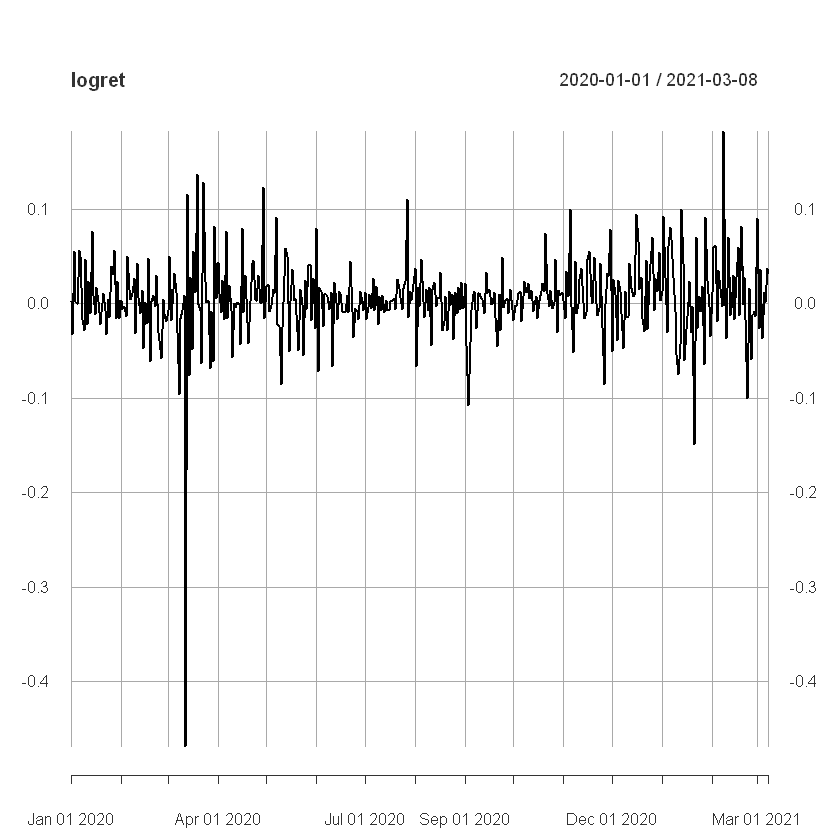

In [8]:
plot(logret)

In [9]:
round(logret,6) # inorder to avoid exponential value

                  TR
2020-01-01  0.002276
2020-01-02 -0.032485
2020-01-03  0.054708
2020-01-04  0.002445
2020-01-05 -0.000654
2020-01-06  0.056196
2020-01-07  0.049745
2020-01-08 -0.016646
2020-01-09 -0.027928
2020-01-10  0.046279
2020-01-11 -0.022365
2020-01-12  0.023436
2020-01-13 -0.010188
2020-01-14  0.076823
2020-01-15  0.008492
2020-01-16 -0.011919
2020-01-17  0.016883
2020-01-18  0.002834
2020-01-19 -0.021645
2020-01-20 -0.008849
2020-01-21  0.011096
2020-01-22 -0.007473
2020-01-23 -0.032653
2020-01-24  0.004560
2020-01-25 -0.014457
2020-01-26  0.038841
2020-01-27  0.030832
2020-01-28  0.056169
2020-01-29 -0.015801
2020-01-30  0.023836
2020-01-31 -0.015962
2020-02-01  0.003396
2020-02-02 -0.006528
2020-02-03 -0.003417
2020-02-04 -0.013418
2020-02-05  0.049512
2020-02-06  0.014701
2020-02-07  0.003988
2020-02-08  0.010768
2020-02-09  0.026257
2020-02-10 -0.031987
2020-02-11  0.042271
2020-02-12  0.006208
2020-02-13 -0.010148
2020-02-14  0.013621
2020-02-15 -0.047211
2020-02-16  0

In [10]:
# Now Calculate the discreet Return from the formula of exp.
ret <- exp(logret)-1  #To go from log return to simple return,
round(head(ret,3),6)

                  TR
2020-01-01  0.002279
2020-01-02 -0.031963
2020-01-03  0.056232

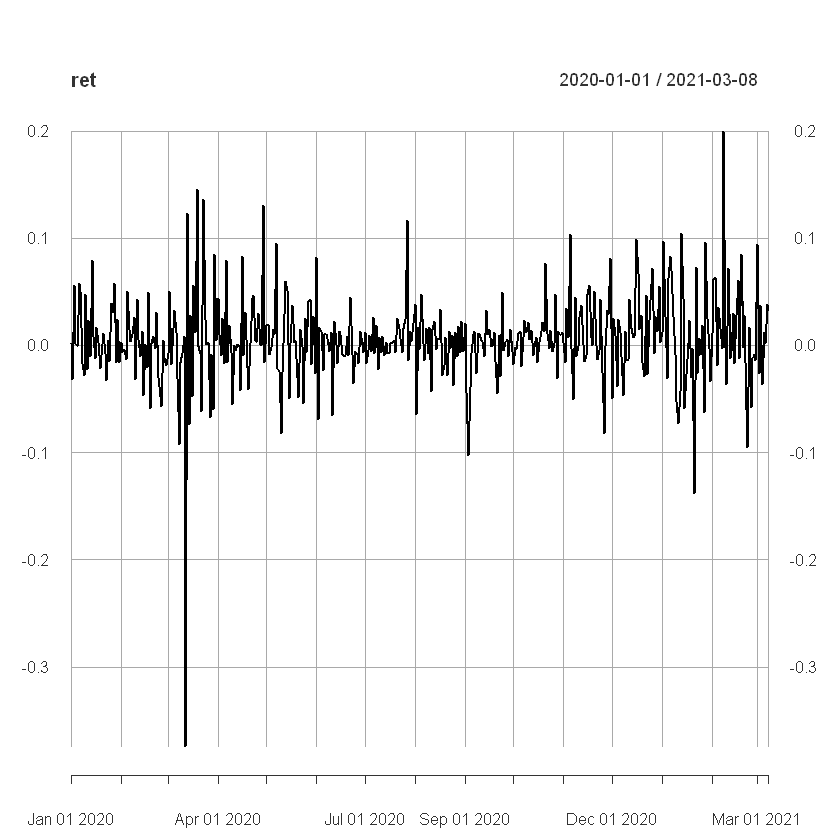

In [11]:
plot(ret)

In [12]:
# Weekly log-return

logret_w <- apply.weekly(BTC1,sum)

round(head(logret_w,3),6)

                 TR
2020-01-05 43315.07
2020-01-12 56171.73
2020-01-19 60913.10

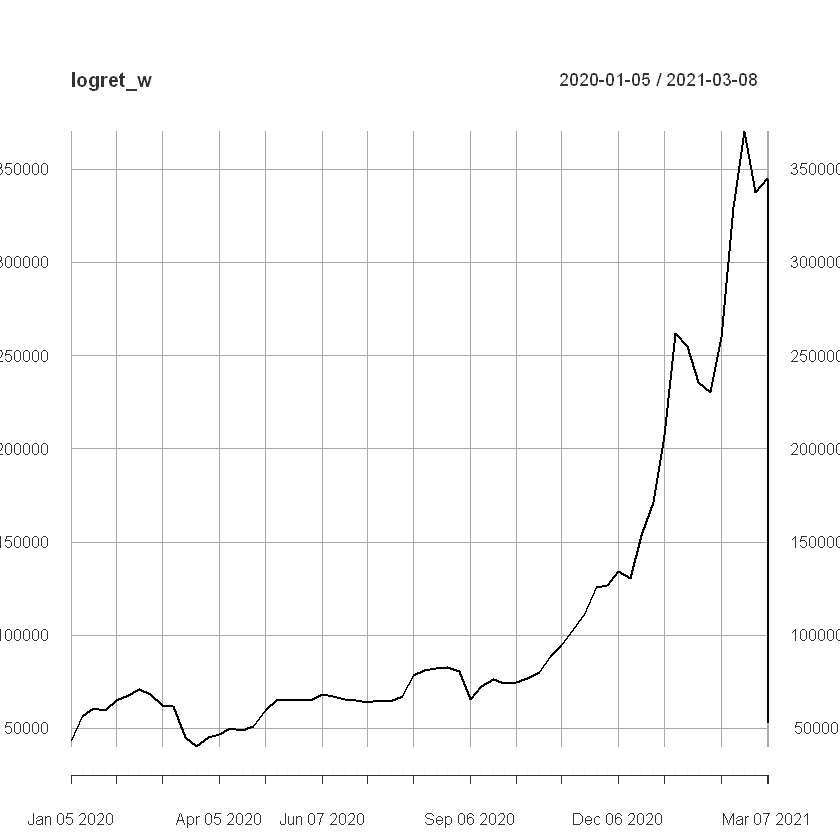

In [13]:
plot(logret_w)

In [14]:
# Calculate discrete return from log-return

ret_w <- exp(logret_w)-1

round(tail(ret_w,3),6)

            TR
2021-02-28 Inf
2021-03-07 Inf
2021-03-08 Inf

In [15]:
#monthly
logret_w1 <- apply.monthly(BTC1,sum)

round(head(logret_w1,3),6)

                  TR
2019-12-31   7158.01
2020-01-31 259446.88
2020-02-29 279586.28

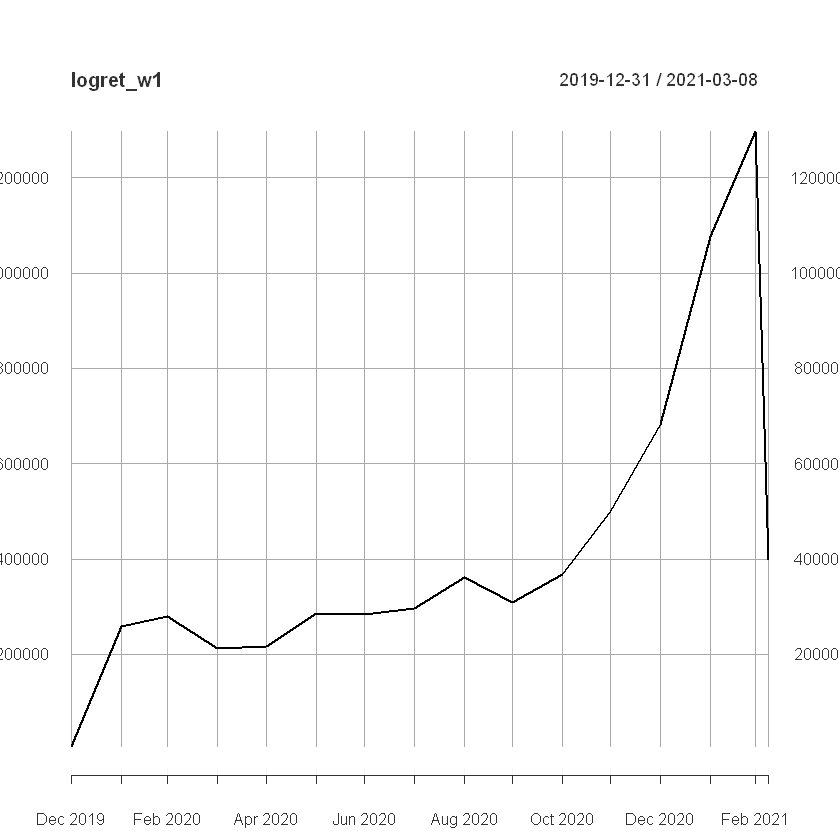

In [16]:
plot(logret_w1)

In [17]:
# Distribution of returns
# ESTIMATE U -using sample mean  and sigma using std. deviation

mu <- round(mean(logret),8)

sig <- round(sd(logret),8)

mu
sig

[1] 0.00461125

[1] 0.04340242

In [18]:
round(qnorm(0.05,mu,sig),6)   # quantile for the normal distribution  # VAR value is -6.6%

[1] -0.066779

In [19]:
# in an 100 billion portfolio investment VAR is
-0.066779 * 100000000000

[1] -6677900000

In [20]:
# Calculating 1-day 95% Expected Shortfall for alpha = 0.05
es <- mu-sig*dnorm(qnorm(0.05,0,1),0,1)/0.05
es
# It means if the log-return is worse than -6.6% then the avg. loss is abt 8.4%

[1] -0.08491548

In [21]:
# Draw 100,000 outcomes from the N(mu,sig) distribution
alpha <- 0.05
set.seed(123789)    #seed value tells the computer where to start the sequence # if i do not set , then each time i get diff.set

rvec <- rnorm(100000,mu,sig)# Get a 100000 rando no.s from a random distribution   # So the result wld be different everytime

VAR <- quantile(rvec,alpha)

ES <- mean(rvec[rvec<VAR])

round(VAR,6)

round(ES,6)
# Simulation method will not give us the exact correct value as it takes an assumption on the mean and std.-deviation

5% 
-0.067148

[1] -0.085776

### Non-Normal Distribution

## As skewness and Kurtosis has an effect on VAR & ES

In [22]:
install.packages('moments')
library(moments)

package 'moments' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\HP\AppData\Local\Temp\RtmpiC9ObS\downloaded_packages


In [23]:
rvec <- as.vector(logret) # Converting into vector
round(skewness(rvec),2) # So left-skewed

[1] -2.72

In [24]:
# If a distribution has fatter tails = Leptokurtic
# # If a distribution has Thinner tails = Platykurtic
rvec <- as.vector(logret)
round(kurtosis(rvec),2) #Heavy Tailed as it is > than 3 | Normal if = 3 |  < 3 - for thin tailed test

[1] 35.89

In [25]:
# Jarque Bera test for normality

rvec <- as.vector(logret)
jarque.test(rvec)  # i.e reject normality


	Jarque-Bera Normality Test

data:  rvec
JB = 20004, p-value < 2.2e-16
alternative hypothesis: greater


### The objective of the class is - How to re-scale the t-distribution with U , STD. dev , Kurtosis , skewness, d.o.f.

### To match the original distribution of the data

### It provides accurate VAR & Es for our data

In [26]:
## Re-scaledt-distribution model
# We use M-L method
# Use the fit-distribution function

In [27]:
library(MASS)

Warning message:
"package 'MASS' was built under R version 3.6.3"

In [28]:
rvec <- as.vector(logret) #Using ML method and finding the best parameters
t.fit <- fitdistr(rvec,"t")
round(t.fit$estimate,6)

Warning message in dt((x - m)/s, df, log = TRUE):
"NaNs produced"Warning message in log(s):
"NaNs produced"Warning message in log(s):
"NaNs produced"Warning message in log(s):
"NaNs produced"Warning message in log(s):
"NaNs produced"Warning message in log(s):
"NaNs produced"Warning message in log(s):
"NaNs produced"Warning message in log(s):
"NaNs produced"Warning message in log(s):
"NaNs produced"Warning message in log(s):
"NaNs produced"Warning message in log(s):
"NaNs produced"Warning message in log(s):
"NaNs produced"Warning message in log(s):
"NaNs produced"Warning message in log(s):
"NaNs produced"Warning message in log(s):
"NaNs produced"Warning message in log(s):
"NaNs produced"Warning message in log(s):
"NaNs produced"Warning message in dt((x - m)/s, df, log = TRUE):
"NaNs produced"

m        s       df 
0.003795 0.022434 2.420263

In [29]:
# Estimating VAR and ES for student-t distribution with the above parameters
alpha <- 0.05
set.seed(123789)
install.packages('metRology')
library(metRology)
rvec <- rt.scaled(100000,mean=t.fit$estimate[1],sd=t.fit$estimate[2],df=t.fit$estimate[3])
# We use rt.scaled fx to simulate data from the re-scaled t-distribution using the estimated parameters
# fIRST argument is- The no. of outcomes we want in our simulation
VAR <- quantile(rvec,alpha)
ES <- mean(rvec[rvec<VAR])
round(VAR,6)

round(ES,6)

package 'metRology' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\HP\AppData\Local\Temp\RtmpiC9ObS\downloaded_packages


Warning message:
"package 'metRology' was built under R version 3.6.3"
Attaching package: 'metRology'

The following objects are masked from 'package:base':

    cbind, rbind



5% 
-0.054271

[1] -0.101928

In [30]:
# Method - B - IID simulation from empirical distribution - simulating from the actual data
alpha <- 0.05
set.seed(123789)
library(metRology)
rvec <- rep(0,100000)
for (i in 1:10){
    rvec <- rvec+sample(as.vector(logret),100000,replace=TRUE)
}
VAR <- quantile(rvec,alpha)
ES <- mean(rvec[rvec<VAR])

VAR
ES

5% 
-0.1620691

[1] -0.3075065

In [31]:
# Method C - Block simulation from empirical distribution
# randomly pick a block of 10 consecutive 1-day log-returns from the actual data.Add them up to get a 10-day log-return
alpha <- 0.05
set.seed(123789)
rvec <- rep(0,100000)
rdat <- as.vector(logret)
posn <- seq(from=1,to=length(rdat)-9,by=1)
rpos <- sample(posn,100000,replace=TRUE)
for (i in 1:10){
    rvec <- rvec+rdat[rpos]
    rpos <- rpos+1
}

VAR <- quantile(rvec,alpha)
ES <- mean(rvec[rvec<VAR])

VAR
ES

5% 
-0.1299164

[1] -0.2868248

In [32]:
# If there is some important time-dependence in our data then method B & C may give different answers

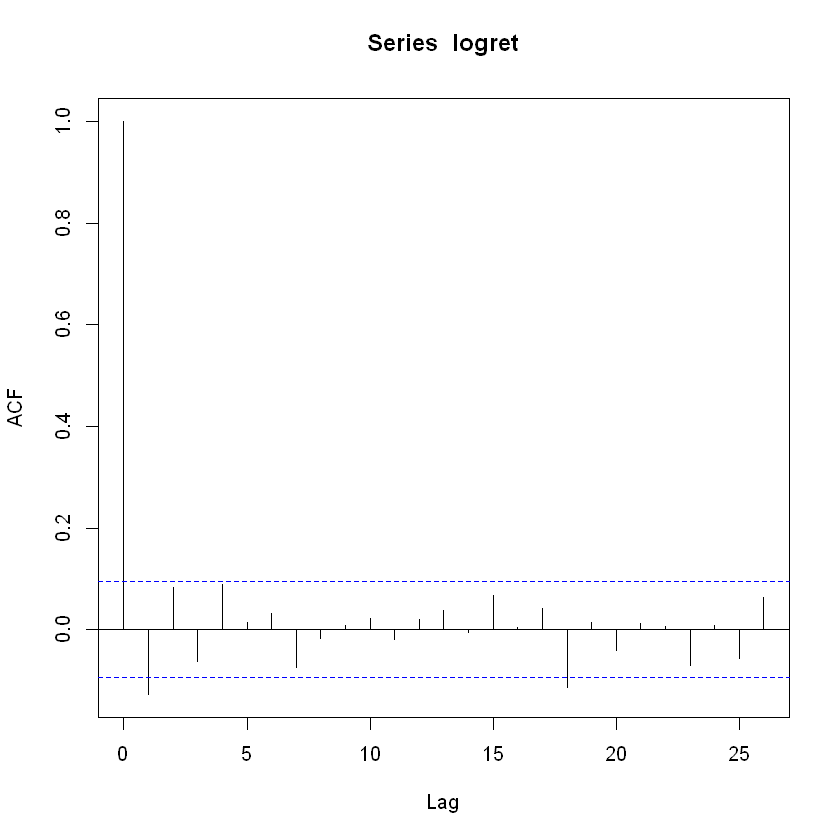

In [33]:
# Auto-correlation f(x) of logret
acf(logret) # dashed lines - 95% confidence band for the acf around 0 - As if it is outside the band - then there is significant
# Serial correlation

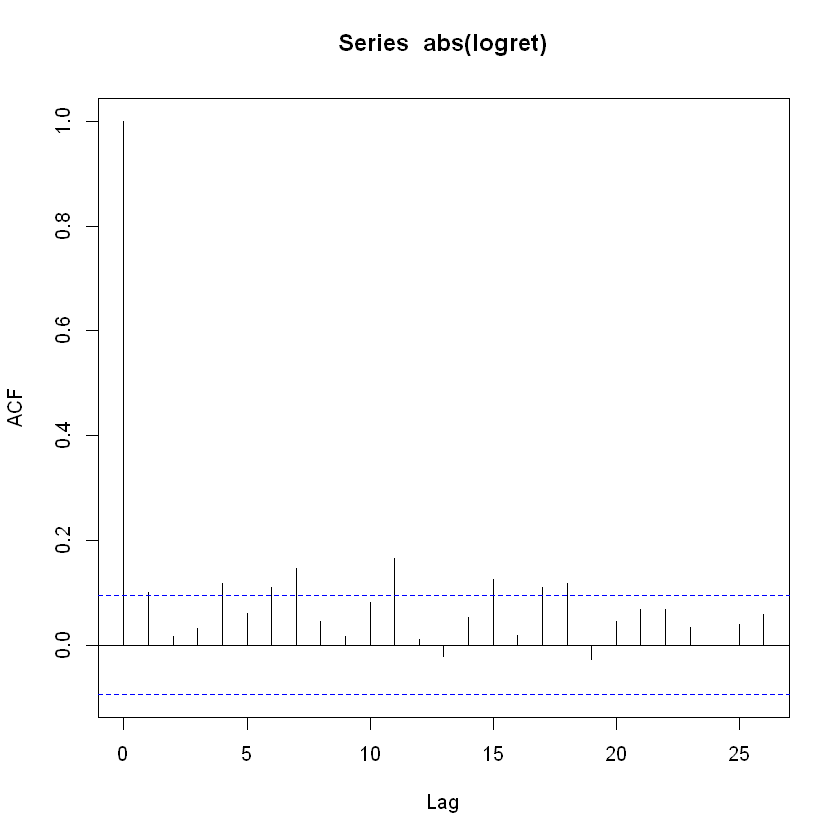

In [34]:
# Volatility Clustering
# ACF for NTC daily log-returns
acf(abs(logret)) # absolute value

In [35]:
#Volatilility which is the standard deviation of log-returns

In [37]:
library(rugarch)

Warning message:
"package 'rugarch' was built under R version 3.6.3"Loading required package: parallel

Attaching package: 'rugarch'

The following object is masked from 'package:stats':

    sigma



In [38]:
garch.N <- ugarchspec(variance.model = list(model = "sGARCH",garchOrder = c(1,1)),
                     mean.model = list(armaOrder = c(0,0),include.mean = TRUE),
                     distribution.model = "norm")
# saving the model as garch.N

In [39]:
fit.garch.N <- ugarchfit(spec = garch.N,data = logret)

In [40]:
fit.garch.N  # Output of estimation


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,1)
Mean Model	: ARFIMA(0,0,0)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.006576    0.001811   3.6302 0.000283
omega   0.000075    0.000030   2.5173 0.011826
alpha1  0.140402    0.039036   3.5968 0.000322
beta1   0.858549    0.027714  30.9786 0.000000

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.006576    0.002502   2.6280 0.008588
omega   0.000075    0.000055   1.3609 0.173531
alpha1  0.140402    0.139710   1.0050 0.314921
beta1   0.858549    0.049987  17.1754 0.000000

LogLikelihood : 757.5102 

Information Criteria
------------------------------------
                    
Akaike       -3.4885
Bayes        -3.4508
Shibata      -3.4886
Hannan-Quinn -3.4736

Weig

In [41]:
# save Fitted Values 
save1 <- cbind(logret,fit.garch.N@fit$sigma,fit.garch.N@fit$z)
names(save1) <- c("logret","s","z")
# we are adding 3 columns logret +  fitted values of sqr root of fitted values of ht
# + Fitted values of et

In [42]:
head(save1)

                  logret          s           z
2020-01-01  0.0022759743 0.04339664 -0.09907951
2020-01-02 -0.0324845675 0.04116390 -0.94889595
2020-01-03  0.0547076124 0.04176107  1.15255470
2020-01-04  0.0024453618 0.04356096 -0.09481725
2020-01-05 -0.0006543243 0.04131022 -0.17501764
2020-01-06  0.0561958745 0.03933796  1.26138173

In [43]:
#Diagnostic test for the neww fitted et
# Distribution of returns
# ESTIMATE U -using sample mean  and sigma using std. deviation

mu <- round(mean(save1$z),8)

sig <- round(sd(save1$z),8)

mu
sig

[1] -0.05157393

[1] 0.9963922

In [44]:
rvec <- as.vector(save1$z) # Converting into vector
round(skewness(rvec),2) # So left-skewed


[1] -2.43

In [45]:
# If a distribution has fatter tails = Leptokurtic
# # If a distribution has Thinner tails = Platykurtic
rvec <- as.vector(save1$z)
round(kurtosis(rvec),2) #Heavy Tailed as it is > than 3 | Normal if = 3 |  < 3 - for thin tailed test

[1] 33.26

In [46]:

# Jarque Bera test for normality

rvec <- as.vector(save1$z)
jarque.test(rvec)  # i.e reject normality


	Jarque-Bera Normality Test

data:  rvec
JB = 16908, p-value < 2.2e-16
alternative hypothesis: greater


In [47]:
#Now the expected values should have the following statistical properties
#Mean =0
#STD = 1
# Skewness=0
#Kurtosis = 3 # As per the GARCH model specifications 
# While in the previous moels the diagnostic test elements where actuallly better

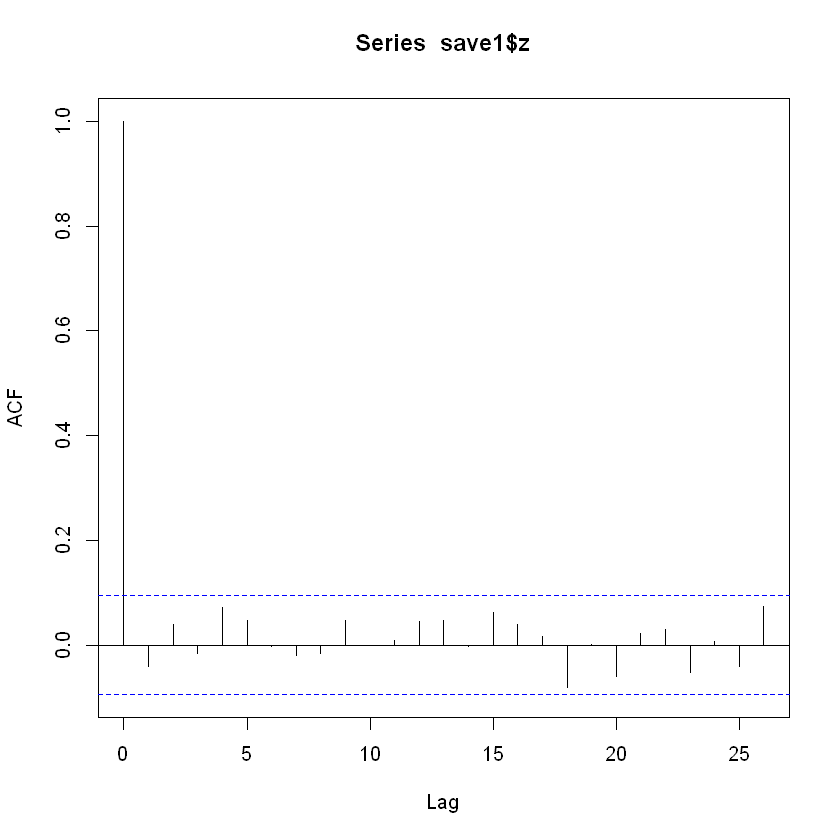

In [48]:
acf(save1$z)

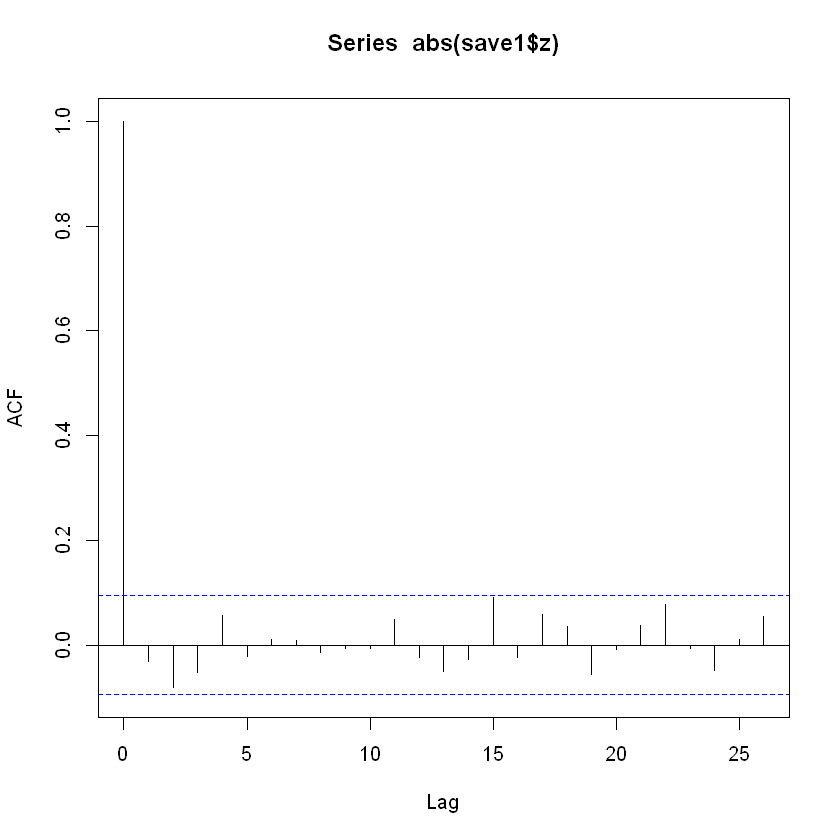

In [49]:
acf(abs(save1$z))

In [ ]:
#Till Now we have done with a GARCH(1,1) model a normal-distribution
# Now with a GARCH(1,1) T-distribution

# saving the model as garch.N

In [50]:
#Till Now we have done with a GARCH(1,1) model a normal-distribution
# Now with a GARCH(1,1) T-distribution
garch.t <- ugarchspec(variance.model = list(model = "sGARCH",garchOrder = c(1,1)),
                     mean.model = list(armaOrder = c(0,0),include.mean = TRUE),
                     distribution.model = "std")

fit.garch.t <- ugarchfit(spec = garch.t,data = logret)

fit.garch.t

# saving the model as garch.t


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,1)
Mean Model	: ARFIMA(0,0,0)
Distribution	: std 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.003614    0.001248   2.8963 0.003775
omega   0.000036    0.000026   1.3746 0.169246
alpha1  0.080750    0.037136   2.1744 0.029674
beta1   0.916241    0.026827  34.1532 0.000000
shape   2.929699    0.423703   6.9145 0.000000

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.003614    0.001110   3.2575 0.001124
omega   0.000036    0.000028   1.2694 0.204289
alpha1  0.080750    0.033546   2.4071 0.016078
beta1   0.916241    0.020883  43.8744 0.000000
shape   2.929699    0.435784   6.7228 0.000000

LogLikelihood : 851.8694 

Information Criteria
------------------------------------
                 

In [53]:
# save Fitted Values
save2 <- cbind(logret,fit.garch.t@fit$sigma,fit.garch.t@fit$z)
names(save2) <- c("logret","s","z")

parm1 <- fit.garch.t@fit$coef

In [54]:
#Diagnostic test for the neww fitted et
# Distribution of returns
# ESTIMATE U -using sample mean  and sigma using std. deviation

mu <- round(mean(save2$z),8)

sig <- round(sd(save2$z),8)

mu
sig

[1] 0.01808848

[1] 1.030075

In [55]:
rvec <- as.vector(save2$z) # Converting into vector
round(skewness(rvec),2) # So left-skewed

[1] -3.07

In [56]:
# If a distribution has fatter tails = Leptokurtic
# # If a distribution has Thinner tails = Platykurtic
rvec <- as.vector(save2$z)
round(kurtosis(rvec),2) #Heavy Tailed as it is > than 3 | Normal if = 3 |  < 3 - for thin tailed test

[1] 41.11

In [57]:
# Jarque Bera test for normality

rvec <- as.vector(save2$z)
jarque.test(rvec)  # i.e reject normality


	Jarque-Bera Normality Test

data:  rvec
JB = 26828, p-value < 2.2e-16
alternative hypothesis: greater


In [52]:
#Now the expected values should have the following statistical properties
#Mean =0
#STD = 1
# Skewness=0
#Kurtosis = 3+6/v-4 # As per the GARCH model specifications 
# While in the previous moels the diagnostic test elements where actuallly better

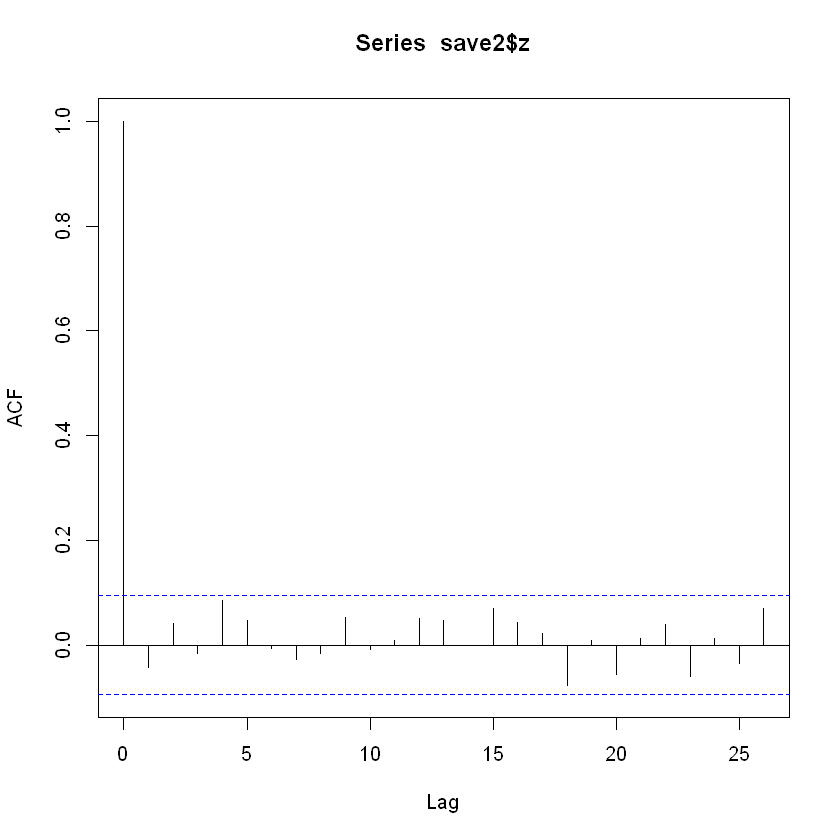

In [58]:
acf(save2$z)

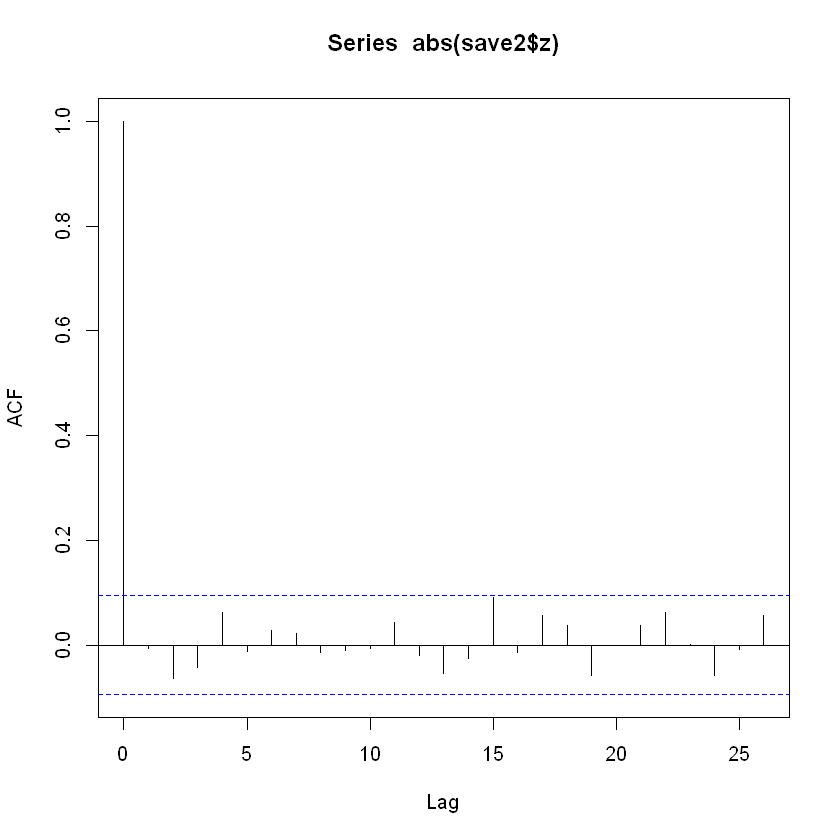

In [59]:
acf(abs(save2$z))

In [ ]:
# Mean & Std are good

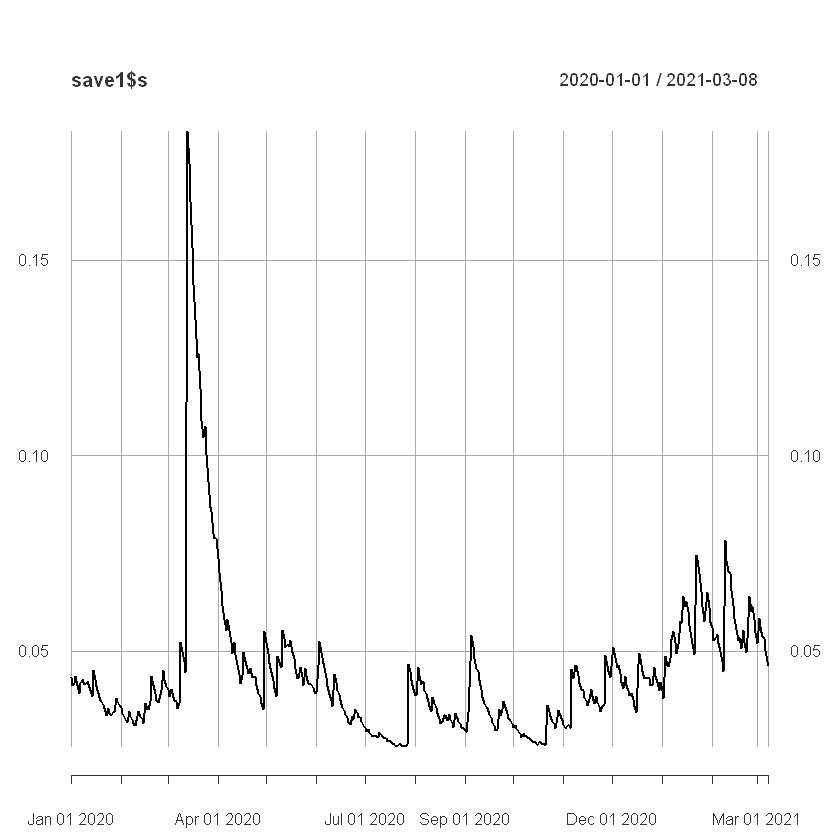

In [60]:
plot(save1$s)

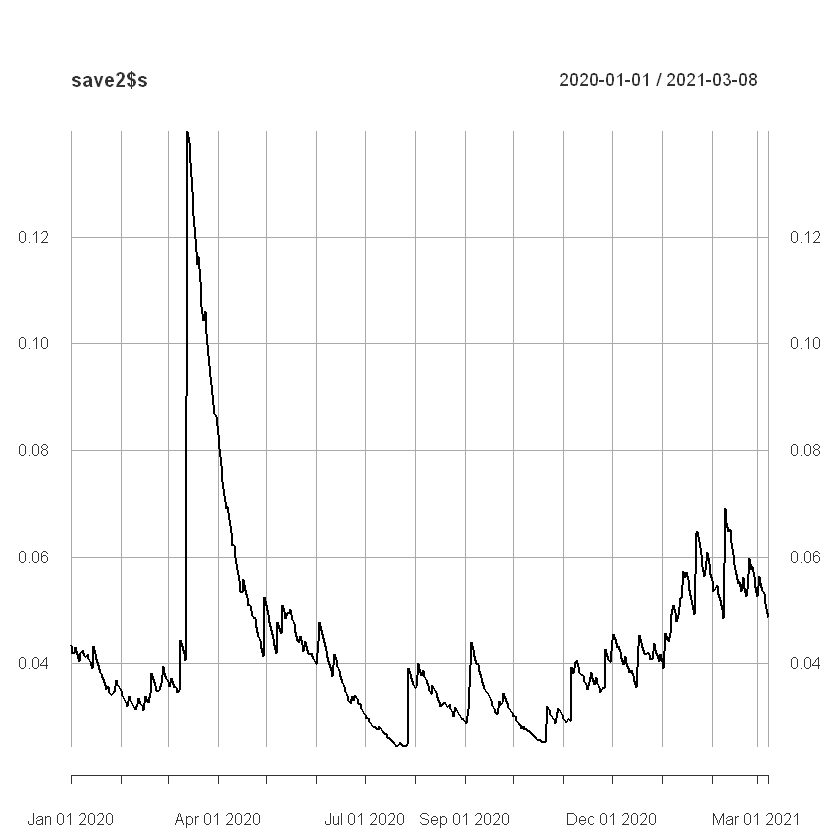

In [61]:
plot(save2$s)

In [62]:
#Graph of fiited sqr. root of ht in both cases - it denotes the volatility clustering in the Bitcoin Prices
# As the volatility is high VAR & ES are going to be High
# As the volatility is low VAR & ES are going to be Low
# So above VAR and ES are going to be high at aril 1,2020

In [63]:
#Now that we have estimated the GARCH model now we can now estimate it to Find VAR & ES using UGARCH boot function
# Simulate 1-day ahead with ugarchboot() fxn

#Simulate outcomes by bootstrapping from fited et of fit.garch.t
set.seed(123789)
boot.garch <- ugarchboot(fit.garch.t,
                        method="Partial",
                        sampling="raw",   #bootstrap fro fitted e
                        n.ahead=1,           #simulation horizon # How many periods to simulate - Me the next day
                        n.bootpred=100000,     #number of simulations
                        solver="solnp") #Save it at boot.garch

In [65]:
#Calculate the VAR and ES from the simulated outcomes


rvec <- boot.garch@fseries
alpha <- 0.05
VAR <- quantile(rvec,alpha)
ES <- mean(rvec[rvec<VAR])

VAR 
ES            # Prediction for 9-03-2021

5% 
-0.05396676

[1] -0.1058876

### In he earlier models Var & ES were calculated by ignoring the ordering of the data # Basicaaly these VAR and ES only apply
### to the typical outcome but Var & ES from the GARCH model change over time
### As in the above graph fiited volatility is low at the end of the period so var & es are low in the current model

### To make this point clearly Let's estimate VAR and ES for Feb 28/2020 - The day covid exploded

In [ ]:
# Now take another dataset for the day covid explodes
# Another day when the indices fell and then comaper VAR of all of them

### The Previous methods which ignored volaitility clustering can only give VAR &Es for a typical day in our sample 
### So why is GARCH model better - i.e. when Volatility is high - Risk is also High so a portfolio manage might want to take actions to redeuce the risk

In [ ]:
#u-garch roll - Here we take data till Jan-2021 and then based on the GARCH-1-day prediction we try roll it and make prediction
# till 2021
# i.e. one predictiion made - Now add it to old data & Predict the next day

In [70]:
# Rolling 1-day VAR with ugarchroll()

n2016 <- length(logret["2020-01-01/2021-01-31"])
rollgarch <- ugarchroll(spec=garch.t,
                        data=logret,
                        n.ahead=1,
                        forecast.length=1,
                        n.start= n2016,
                        refit.every=1,
                        refit.window="recursive",
                        calculate.VAR=TRUE,
                        VAR.alpha=0.05,
                        keep.coef=TRUE)

In [74]:
rollgarch


*-------------------------------------*
*              GARCH Roll             *
*-------------------------------------*
No.Refits		: 36
Refit Horizon	: 1
No.Forecasts	: 36
GARCH Model		: sGARCH(1,1)
Distribution	: std 

Forecast Density:
               Mu  Sigma Skew  Shape Shape(GIG) Realized
2021-02-01 0.0034 0.0550    0 2.9156          0   0.0115
2021-02-02 0.0034 0.0526    0 2.9066          0   0.0596
2021-02-03 0.0035 0.0533    0 2.9271          0   0.0617
2021-02-04 0.0035 0.0541    0 2.9481          0  -0.0187
2021-02-05 0.0035 0.0522    0 2.9493          0   0.0346
2021-02-06 0.0035 0.0508    0 2.9619          0   0.0160

..........................
               Mu  Sigma Skew  Shape Shape(GIG) Realized
2021-03-03 0.0035 0.0555    0 2.9054          0   0.0365
2021-03-04 0.0035 0.0543    0 2.9126          0  -0.0373
2021-03-05 0.0035 0.0536    0 2.9273          0   0.0119
2021-03-06 0.0035 0.0516    0 2.9150          0   0.0016
2021-03-07 0.0035 0.0497    0 2.9040          0  